In [1]:
# Importing required librarries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Connecting google colab with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Reading the 'Sample_houseprice_bangalore_2.csv' file as df
df = pd.read_csv('/content/drive/MyDrive/Datasets/Sample_homeprices_banglore_2.csv')
df.head() # Observe that the data is not scaled

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [9]:
# Separating the dependent and independent features as y and X
X = df.drop('price', axis = 'columns') # Set for independent features
y = df['price'] # Set for dependent features

In [10]:
# Min-Max scaling for the dependent and independent features
from sklearn.preprocessing import MinMaxScaler

# Creating two scaling objects for X and y separately
sx = MinMaxScaler()
sy = MinMaxScaler()

In [14]:
# Scaling the set of independent variables X and dependent variable y
X_scaled = sx.fit_transform(X)
y_scaled = sy.fit_transform(y.values.reshape(df.shape[0],1))

### Define the function used for Batch gradient descent
* Remember that the complete training sample is used for each epoch
* Set learning rate as 0.01
* Initialize weights and bias values as 0
* Calculate predicted values
* Calculate gradient w.r.t. weights and bias

In [19]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In
    # our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0] # number of rows in X
    cost_list = []
    epoch_list = []
    for i in range(epochs):
        y_predicted = np.dot(w, X.T) + b
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

In [20]:
# Implement the above function and get the updated weights, bias and cost function value for 500 epochs
w, b, cost, cost_list, epoch_list = batch_gradient_descent(X_scaled, y_scaled.reshape(y_scaled.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

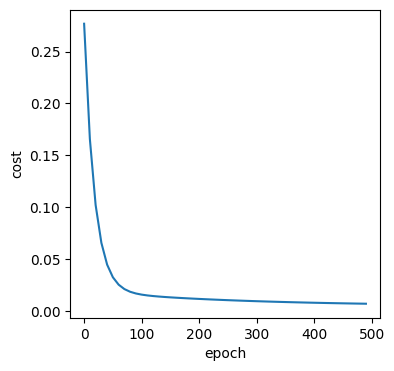

In [24]:
# Plot the Cost vs Epoch graph for Batch Gradient Descent Method and observe how it looks like
plt.figure(figsize = (4,4))
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

### Stochastic Gradient Descent Implementation
Stochastic GD will use randomly picked single training sample to calculate error and using this error we backpropage to adjust weights

In [45]:
# we will use random libary to pick random training sample.
import random
random.randint(0,6) # randit gives random number between two numbers specified in the argument

2

In [46]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]
    cost_list = []
    epoch_list = []
    for i in range(epochs):
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w, sample_x.T) + b
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        cost = np.square(sample_y-y_predicted)
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

In [47]:
# Implement the stochastic_gradient_descent function on X and y
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(X_scaled, y_scaled.reshape(y_scaled.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.70556832, 0.67368438]), -0.22951690945490738, 0.0017129942588845215)

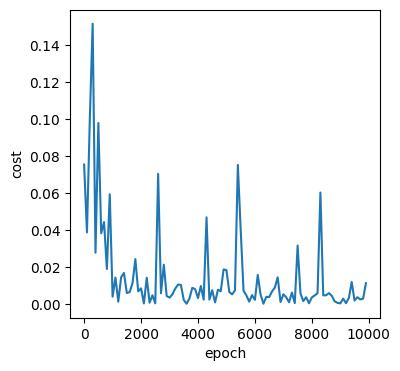

In [48]:
# Plotting the Cost vs epoch curve for Stochastic gradient descent method and observe the graph
plt.figure(figsize = (4,4))
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)